In [3]:
import pandas as pd
dfl = pd.read_csv("Leases.csv")
dmm = pd.read_csv("Major Market Occupancy Data-revised.csv")
dpa = pd.read_csv("Price and Availability Data.csv")
du = pd.read_csv("Unemployment.csv")

# list(dfl.columns.values)
# print(list(dmm.columns.values))
# list(dpa.columns.values)
print(du)
list(du.columns.values)
print(dfl['market'].dropna().unique())


large_leases = dfl[dfl['leasedSF'] >= 10000]


      year quarter  month state  unemployment_rate
0     2018      Q1      1    AZ                4.9
1     2018      Q1      1    CA                4.4
2     2018      Q1      1    CO                2.9
3     2018      Q1      1    DE                4.1
4     2018      Q1      1    DC                5.9
...    ...     ...    ...   ...                ...
1843  2024      Q4     12    TN                3.6
1844  2024      Q4     12    TX                4.2
1845  2024      Q4     12    UT                3.5
1846  2024      Q4     12    VA                3.0
1847  2024      Q4     12    WA                4.5

[1848 rows x 5 columns]
['Atlanta' 'Austin' 'Baltimore' 'Boston' 'Charlotte' 'Chicago'
 'Chicago Suburbs' 'Dallas/Ft Worth' 'Denver' 'Detroit' 'Houston'
 'Los Angeles' 'Manhattan' 'Nashville' 'Northern New Jersey'
 'Northern Virginia' 'Orange County' 'Philadelphia' 'Phoenix'
 'Raleigh/Durham' 'Salt Lake City' 'San Diego' 'San Francisco' 'Seattle'
 'South Bay/San Jose' 'South Florida' 

,overall_rent,availability_proportion
overall_rent,1.000000,-0.048407
availability_proportion,-0.048407,1.000000


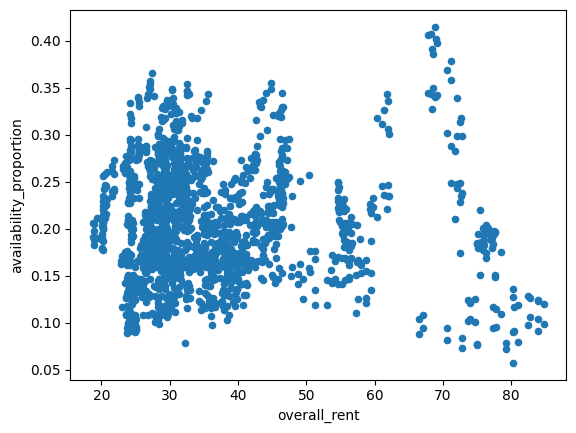

In [6]:
"""
1. Are higher rents associated with lower vacancy rates?
Datasets: Price and Availability
Variables: overall_rent, availability_proportion

"""
import matplotlib.pyplot as plt
dpa.plot.scatter(x='overall_rent', y='availability_proportion')
dpa[['overall_rent', 'availability_proportion']].corr()

In [42]:
large_leases.groupby('CBD_suburban')['leasedSF'].mean()
# This groups the data into two categories:
# One for all leases in CBD
# One for all leases in Suburban


CBD_suburban
CBD         37578.381596
Suburban    29376.249008
Name: leasedSF, dtype: float64

In [4]:
dfl['internal_industry'].dropna().unique()
tech_leases = dfl[dfl['internal_industry'] == 'Technology, Advertising, Media, and Information']
tech_large = tech_leases[tech_leases['leasedSF'] >= 10000]
tech_small = tech_leases[tech_leases['leasedSF'] < 10000]

legal_leases = dfl[dfl["internal_industry"] == "Legal Services"]
legal_large = legal_leases[legal_leases['leasedSF'] >= 10000]

fin_leases = dfl[dfl["internal_industry"] == "Financial Services and Insurance"]
fin_large = fin_leases[fin_leases['leasedSF'] >= 10000]


# LOOK AT TECH, LEGAL, FIN LEASES SEPARATELY


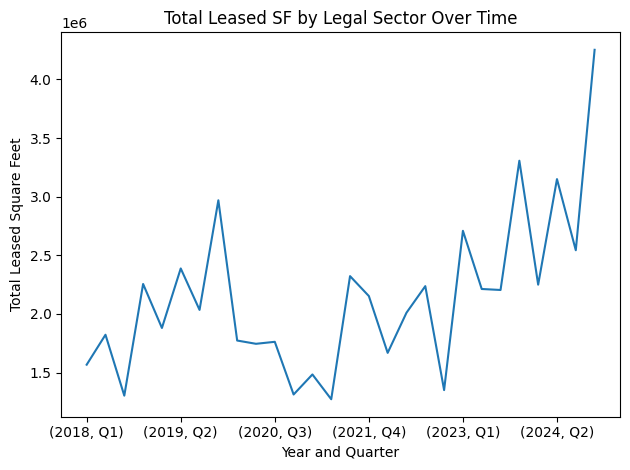

    year internal_class  total_leased_SF   avg_rent  num_leases
0   2018              A        4230381.0  46.300130         122
1   2018              O         511570.0  53.959625          53
2   2019              A        6738124.0  46.403096         136
3   2019              O         335886.0  36.939465          41
4   2020              A        4015154.0  47.059022         123
5   2020              O         377634.0  43.010653          31
6   2021              A        4379345.0  48.030980         143
7   2021              O         572423.0  46.659797          41
8   2022              A        5385465.0  46.370654         185
9   2022              O         230531.0  47.227246          25
10  2023              A        7629478.0  48.123121         212
11  2023              O         327163.0  52.720711          45
12  2024              A        8189354.0  47.938766         254
13  2024              O         592128.0  48.691754          64


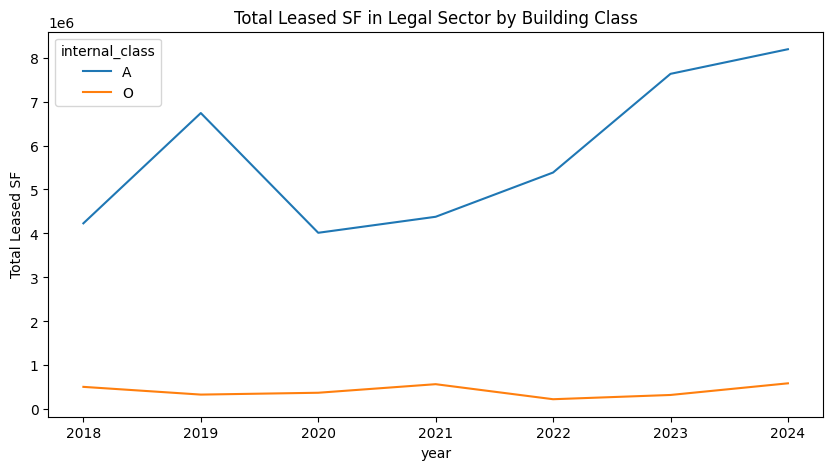

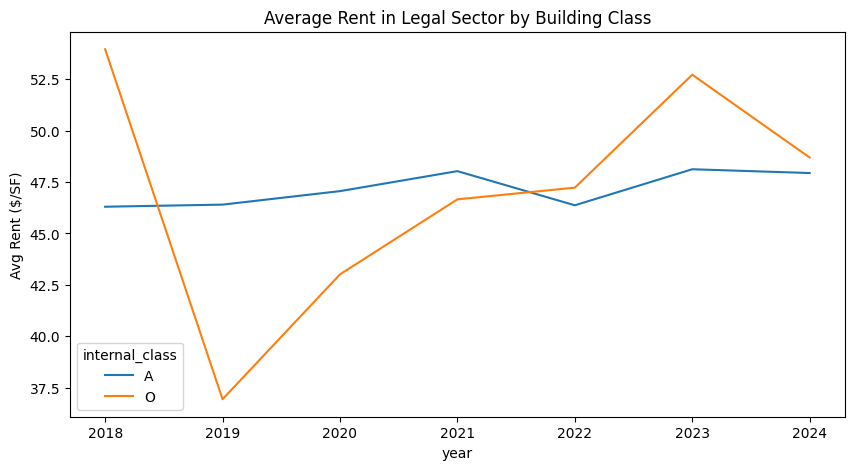

In [69]:
legal_large.groupby(['year', 'quarter'])['leasedSF'].sum().plot()
plt.title('Total Leased SF by Legal Sector Over Time')
plt.xlabel('Year and Quarter')
plt.ylabel('Total Leased Square Feet')
plt.tight_layout()
plt.show()

# tech_small.isnull().sum().sort_values(ascending=False) 
# displays count of missing values for each variable

legal_class = legal_leases.dropna(subset=['leasedSF', 'overall_rent', 'year'])
summary = legal_class.groupby(['year', 'internal_class']).agg(
    total_leased_SF=('leasedSF', 'sum'),
    avg_rent=('overall_rent', 'mean'),
    num_leases=('leasedSF', 'count')  # count of leases per group
).reset_index()

print(summary)

import seaborn as sns
import matplotlib.pyplot as plt

# Leased SF
plt.figure(figsize=(10, 5))
sns.lineplot(data=summary, x='year', y='total_leased_SF', hue='internal_class')
plt.title('Total Leased SF in Legal Sector by Building Class')
plt.ylabel('Total Leased SF')
plt.show()

# Avg Rent
plt.figure(figsize=(10, 5))
sns.lineplot(data=summary, x='year', y='avg_rent', hue='internal_class')
plt.title('Average Rent in Legal Sector by Building Class')
plt.ylabel('Avg Rent ($/SF)')
plt.show()

In [19]:
legal_leases = legal_leases.dropna(subset=['leasedSF', 'year', 'CBD_suburban'])

# Group by year and CBD/suburban
legal_cbd = legal_leases.groupby(['year', 'CBD_suburban']).agg(
    total_leased_SF=('leasedSF', 'sum'),
    avg_rent=('overall_rent', 'mean'),
    num_leases=('leasedSF', 'count')
).reset_index()
print(legal_cbd)

    year CBD_suburban  total_leased_SF   avg_rent  num_leases
0   2018          CBD        6905465.0  54.684865         194
1   2018     Suburban         450214.0  31.611486          59
2   2019          CBD        8397138.0  49.776971         196
3   2019     Suburban        1160816.0  30.831110          74
4   2020          CBD        5853052.0  53.317361         162
5   2020     Suburban        1020120.0  31.531689          67
6   2021          CBD        6669081.0  53.725720         187
7   2021     Suburban         889058.0  32.077667          66
8   2022          CBD        6660681.0  52.058395         227
9   2022     Suburban        1043331.0  32.176856          77
10  2023          CBD        9092420.0  55.900533         248
11  2023     Suburban        1747754.0  33.778270         101
12  2024          CBD       10634489.0  53.856362         310
13  2024     Suburban        2105531.0  35.701864         141


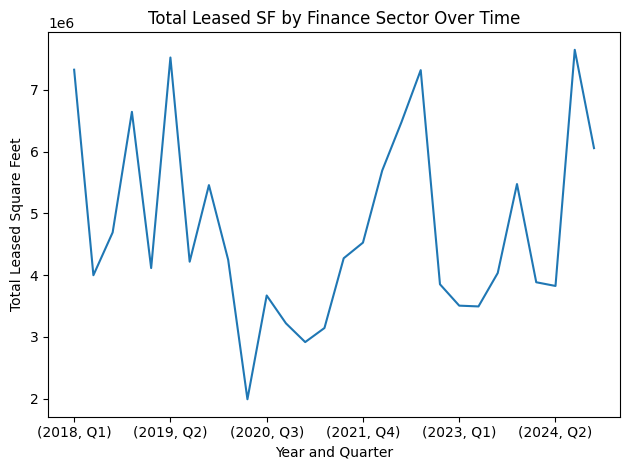

    year internal_class  total_leased_SF   avg_rent  num_leases
0   2018              A       17124778.0  51.738981         368
1   2018              O        1877244.0  44.268692          94
2   2019              A       16800967.0  48.399298         327
3   2019              O        1457494.0  43.158089         103
4   2020              A        8935237.0  49.686330         269
5   2020              O        1703290.0  41.563294          94
6   2021              A       10867839.0  52.926088         383
7   2021              O        2174592.0  43.826397         108
8   2022              A       17682057.0  56.304710         458
9   2022              O        2121584.0  56.427534         102
10  2023              A       12856112.0  53.698200         417
11  2023              O        1328681.0  57.224079          83
12  2024              A       16374564.0  53.018073         513
13  2024              O        1950648.0  53.993853         126


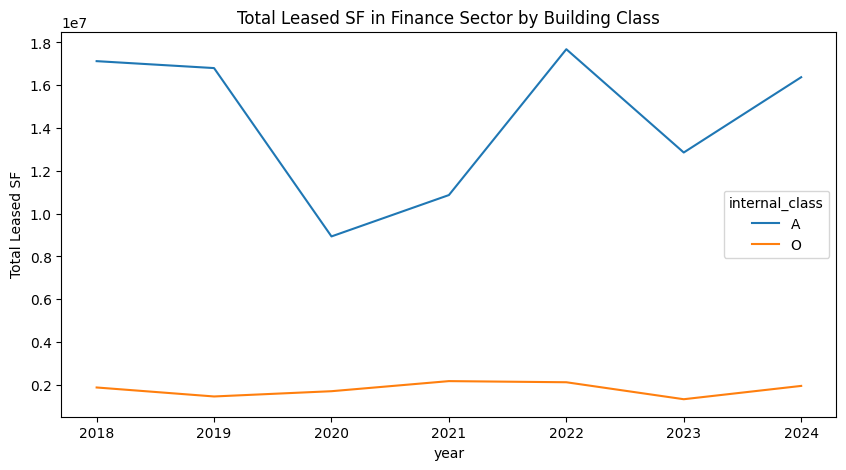

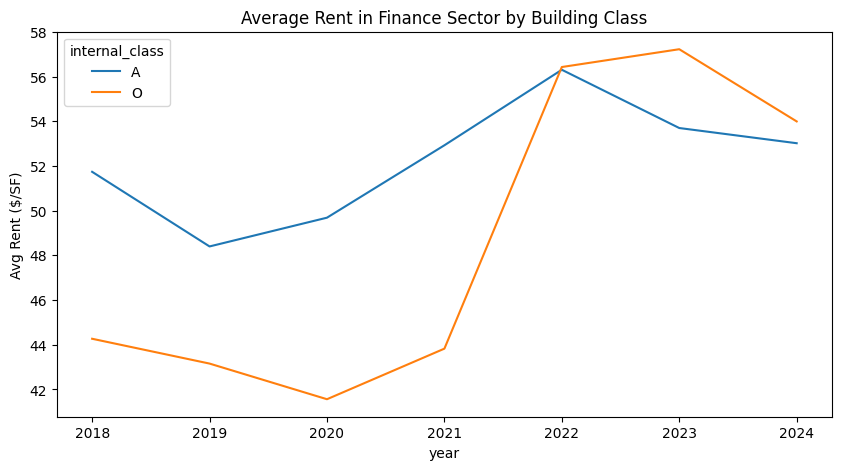

In [13]:
fin_large.groupby(['year', 'quarter'])['leasedSF'].sum().plot()
plt.title('Total Leased SF by Finance Sector Over Time')
plt.xlabel('Year and Quarter')
plt.ylabel('Total Leased Square Feet')
plt.tight_layout()
plt.show()

# tech_small.isnull().sum().sort_values(ascending=False) 
# displays count of missing values for each variable

fin_class = fin_leases.dropna(subset=['leasedSF', 'overall_rent', 'year'])
summary = fin_class.groupby(['year', 'internal_class']).agg(
    total_leased_SF=('leasedSF', 'sum'),
    avg_rent=('overall_rent', 'mean'),
    num_leases=('leasedSF', 'count')  # count of leases per group
).reset_index()

print(summary)

import seaborn as sns
import matplotlib.pyplot as plt

# Leased SF
plt.figure(figsize=(10, 5))
sns.lineplot(data=summary, x='year', y='total_leased_SF', hue='internal_class')
plt.title('Total Leased SF in Finance Sector by Building Class')
plt.ylabel('Total Leased SF')
plt.show()

# Avg Rent
plt.figure(figsize=(10, 5))
sns.lineplot(data=summary, x='year', y='avg_rent', hue='internal_class')
plt.title('Average Rent in Finance Sector by Building Class')
plt.ylabel('Avg Rent ($/SF)')
plt.show()

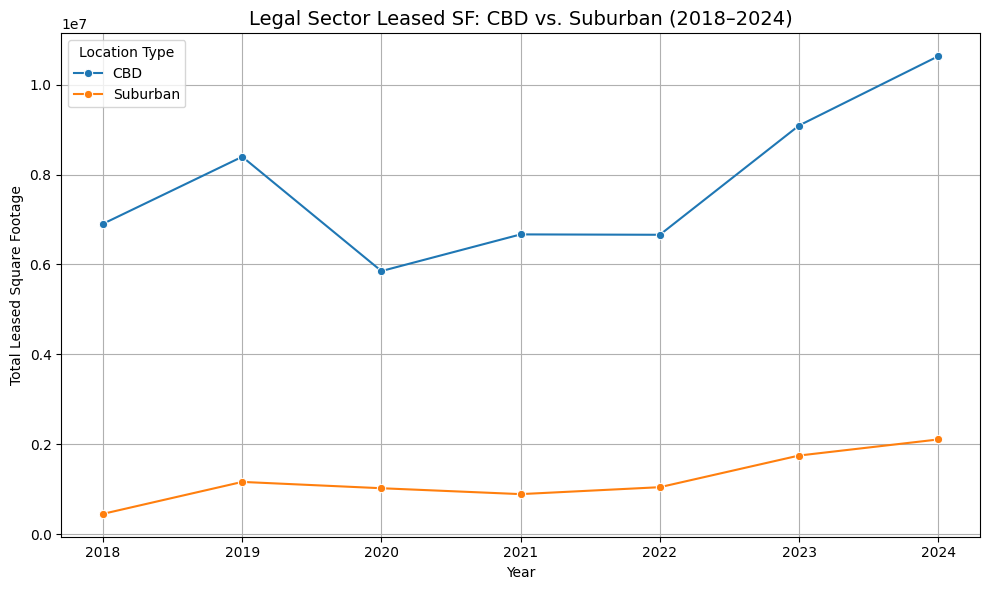

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter and group the data (if not done already)
legal_leases = legal_leases.dropna(subset=['leasedSF', 'year', 'CBD_suburban'])
legal_cbd = legal_leases.groupby(['year', 'CBD_suburban']).agg(
    total_leased_SF=('leasedSF', 'sum')
).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=legal_cbd, x='year', y='total_leased_SF', hue='CBD_suburban', marker='o')

# Formatting
plt.title('Legal Sector Leased SF: CBD vs. Suburban (2018–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Leased Square Footage')
plt.legend(title='Location Type')
plt.grid(True)
plt.tight_layout()
plt.show()

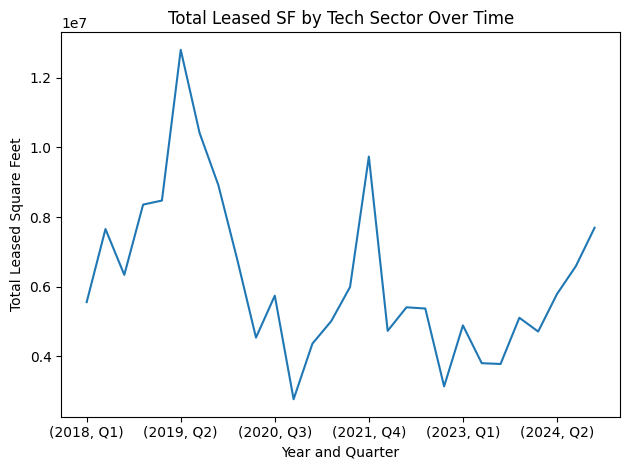

    year internal_class  total_leased_SF   avg_rent  num_leases
0   2018              A       12631704.0  44.662898         242
1   2018              O        5750704.0  59.316899         156
2   2019              A       27255088.0  44.810712         301
3   2019              O        5421097.0  56.772509         165
4   2020              A       12629096.0  45.791693         221
5   2020              O        3618862.0  51.968260         126
6   2021              A       14973811.0  45.871360         272
7   2021              O        4217355.0  52.929759         144
8   2022              A       10170718.0  46.776771         246
9   2022              O        4338796.0  60.881879         163
10  2023              A        9748464.0  47.249238         238
11  2023              O        3910534.0  59.203328         151
12  2024              A       13817359.0  47.170127         309
13  2024              O        4699271.0  58.752819         174


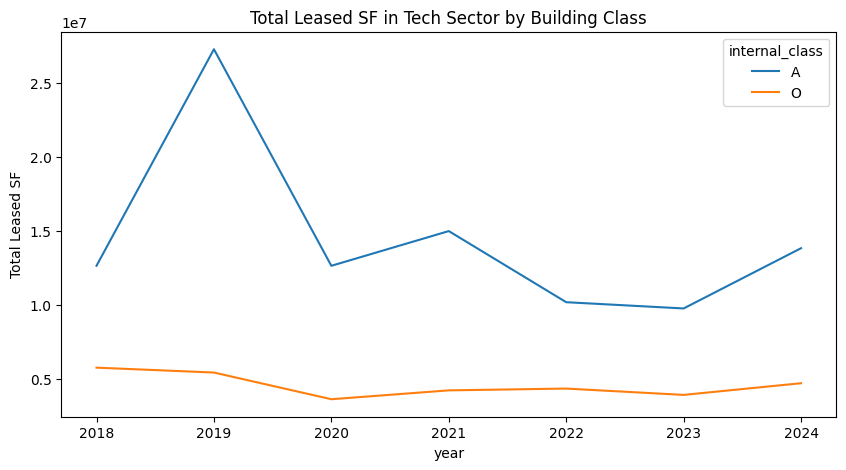

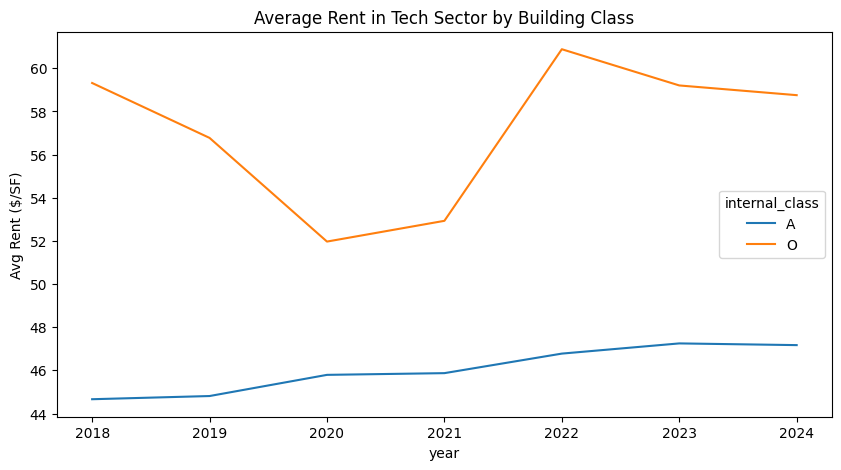

In [61]:
tech_leases.groupby(['year', 'quarter'])['leasedSF'].sum().plot()
plt.title('Total Leased SF by Tech Sector Over Time')
plt.xlabel('Year and Quarter')
plt.ylabel('Total Leased Square Feet')
plt.tight_layout()
plt.show()

tech_small.isnull().sum().sort_values(ascending=False) 
# displays count of missing values for each variable

tech_class = tech_leases.dropna(subset=['leasedSF', 'overall_rent', 'year'])
summary = tech_class.groupby(['year', 'internal_class']).agg(
    total_leased_SF=('leasedSF', 'sum'),
    avg_rent=('overall_rent', 'mean'),
    num_leases=('leasedSF', 'count')  # count of leases per group
).reset_index()

print(summary)

import seaborn as sns
import matplotlib.pyplot as plt

# Leased SF
plt.figure(figsize=(10, 5))
sns.lineplot(data=summary, x='year', y='total_leased_SF', hue='internal_class')
plt.title('Total Leased SF in Tech Sector by Building Class')
plt.ylabel('Total Leased SF')
plt.show()

# Avg Rent
plt.figure(figsize=(10, 5))
sns.lineplot(data=summary, x='year', y='avg_rent', hue='internal_class')
plt.title('Average Rent in Tech Sector by Building Class')
plt.ylabel('Avg Rent ($/SF)')
plt.show()

<Axes: title={'center': 'Tech Leased SF by Year in Major Markets'}, xlabel='year'>

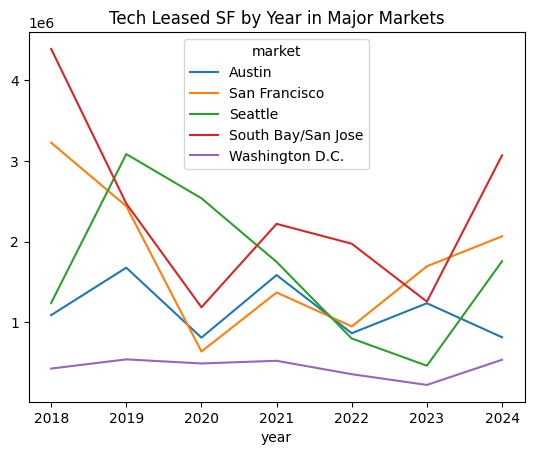

In [10]:
# Leased SF in tech savvy cities
tech_cities = ['San Francisco', 'South Bay/San Jose', 'Seattle', 'Washington D.C.', "Austin"]
tech_hubs = tech_leases[tech_leases['market'].isin(tech_cities)]
demand = tech_hubs.groupby(['year', 'market'])['leasedSF'].sum().unstack()
demand.plot(title='Tech Leased SF by Year in Major Markets')

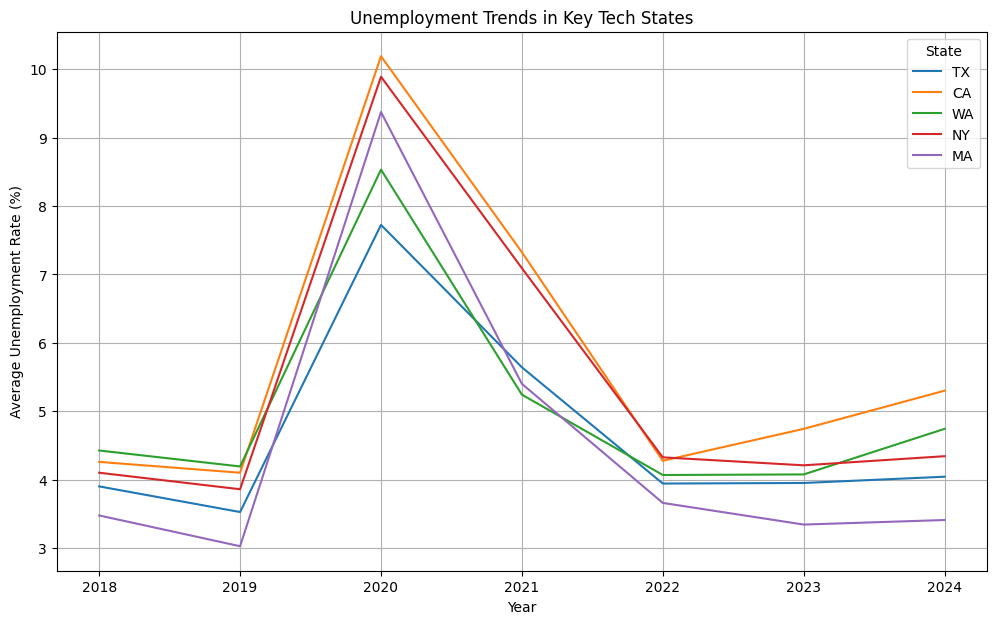

In [94]:
tech_states = ['TX', 'CA', 'WA', 'NY', 'MA']

# Filter data for only the tech states
tech_unemployment = du[du['state'].isin(tech_states)].dropna(subset=['unemployment_rate'])

# Group by state and year, then take average unemployment rate for each year
tech_unemployment_by_year = (
    tech_unemployment
    .groupby(['state', 'year'])['unemployment_rate']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 7))

for state in tech_states:
    subset = tech_unemployment_by_year[tech_unemployment_by_year['state'] == state]
    plt.plot(subset['year'], subset['unemployment_rate'], label=state)

plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Unemployment Trends in Key Tech States')
plt.legend(title='State')
plt.grid(True)
plt.show()

# BY MARKET RENT

year
2018    32.757202
2019    35.520549
2020    37.823547
2021    37.640670
2022    38.812851
2023    39.236859
2024    41.776359
Name: overall_rent, dtype: float64


<Axes: xlabel='year'>

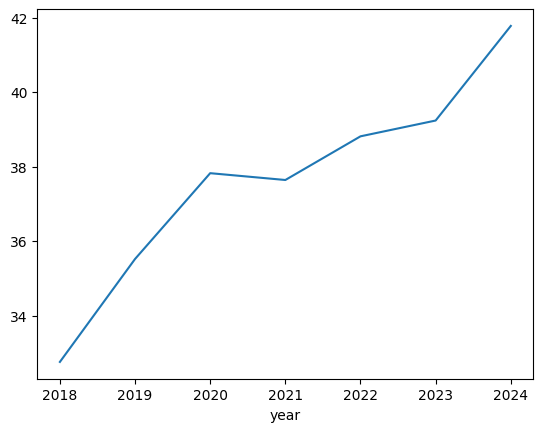

In [62]:
sandiego_data = dpa[dpa['market'] == 'San Diego']

# Group by year and calculate average overall rent
sandiego_rent_by_year = sandiego_data.groupby('year')['overall_rent'].mean()

# Display the result
print(sandiego_rent_by_year)
sandiego_rent_by_year.plot()

year
2018    25.823866
2019    27.234913
2020    29.212861
2021    29.864276
2022    30.682647
2023    31.386658
2024    32.655400
Name: overall_rent, dtype: float64


<Axes: xlabel='year'>

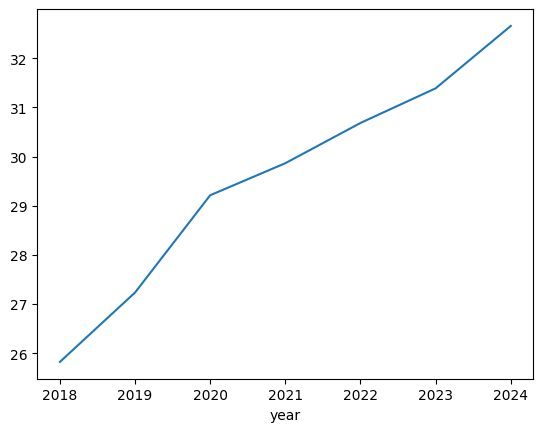

In [28]:
atlanta_data = dpa[dpa['market'] == 'Atlanta']

# Group by year and calculate average overall rent
atlanta_rent_by_year = atlanta_data.groupby('year')['overall_rent'].mean()

# Display the result
print(atlanta_rent_by_year)
atlanta_rent_by_year.plot()

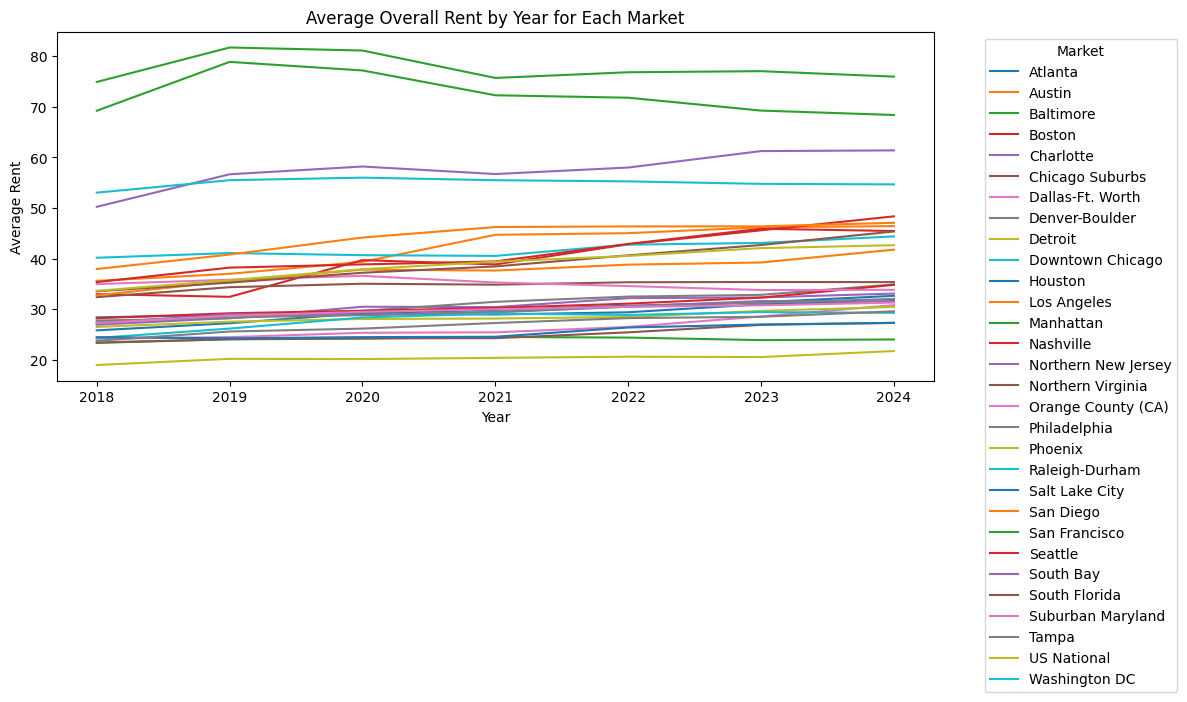

In [30]:
rent_by_market_year = dpa.groupby(['year', 'market'])['overall_rent'].mean().unstack()
# Plot all markets on one graph
rent_by_market_year.plot(figsize=(12, 6))
plt.title('Average Overall Rent by Year for Each Market')
plt.xlabel('Year')
plt.ylabel('Average Rent')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

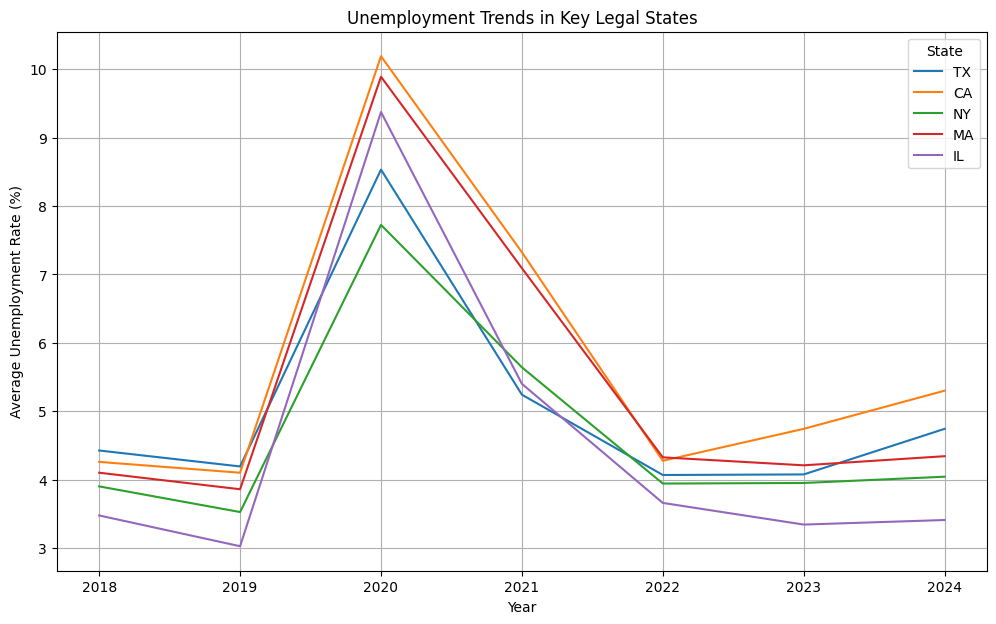

In [98]:
legal_states = ['TX', 'CA', 'NY', 'MA', 'IL']

# Filter data for only the tech states
legal_unemployment = du[du['state'].isin(legal_states)].dropna(subset=['unemployment_rate'])

# Group by state and year, then take average unemployment rate for each year
legal_unemployment_by_year = (
    legal_unemployment
    .groupby(['state', 'year'])['unemployment_rate']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 7))

for state in legal_states:
    subset = tech_unemployment_by_year[legal_unemployment_by_year['state'] == state]
    plt.plot(subset['year'], subset['unemployment_rate'], label=state)

plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Unemployment Trends in Key Legal States')
plt.legend(title='State')
plt.grid(True)
plt.show()